In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
#Load the dataset
df = pd.read_csv('sustainable_packaging_dataset.csv')
print("Original Attributes")
print(df.columns.tolist())
print("\nSample Data (Before Processing):")
print(df.head(5))

Original Attributes
['Product category', 'Product sub category', 'Packaging material', 'Strength', 'Biodegradability score', 'CO2 emission score', 'Recyclability %', 'Weight Capacity (kg)']

Sample Data (Before Processing):
  Product category Product sub category   Packaging material Strength  \
0      Electronics           Smartphone  Mushroom (Mycelium)   medium   
1      Electronics           Smartphone    Bio-Polycarbonate     high   
2      Electronics           Smartphone           Nylon (PA)     high   
3      Electronics           Smartphone   Polycarbonate (PC)     high   
4      Electronics           Smartphone           Paperboard   medium   

   Biodegradability score  CO2 emission score  Recyclability %  \
0                     100                   5                1   
1                       1                  56               33   
2                       3                  84               29   
3                       0                  89               22   
4      

In [5]:
# DATA CLEANING & ENCODING
df = df.dropna()
#encoding
fragile_list = [
    'Smartphone', 'Laptop', 'Tablet', 'Smartwatch', 'Camera', 'Monitor', 
    'Drone', 'VR Headset', 'Game Console', 'Graphics Card', 'Microphones', 
    'Turntables', 'MP3 Players', 'Audio Interfaces', 'Vase', 'Lamp', 'Bowl', 
    'Mirror', 'Candle Holder', 'Clock', 'Glass Art', 'Pottery', 'Vial', 
    'Beaker', 'Flask', 'Test Tube', 'Pipette', 'Petri Dish', 'Microscope Slide', 
    'Stethoscopes', 'Thermometers', 'Scalpels', 'Optical Lens', 'Prism', 
    'Telescope Lens', 'Sapphire Glass', 'Luxury Watches', 'Tourbillon Watch', 
    'Chronograph', 'Wine', 'Beer', 'Spirits', 'Luxury Perfumes', 
    'Scented Candle', 'Diffuser Oil'
]
strength_map = {'low': 1, 'medium': 2, 'high': 3}
df['Strength_Encoded'] = df['Strength'].str.lower().map(strength_map)

# Label Encoding for Material and Category
le = LabelEncoder()
df['Fragility'] = df['Product sub category'].apply(lambda x: 1 if x in fragile_list else 0)
df['Product_Category_Encoded'] = le.fit_transform(df['Product category'])
df['Packaging_Material_Encoded'] = le.fit_transform(df['Packaging material'])


In [6]:
# FEATURE ENGINEERING
# CO2 Impact Index :- High emission and low recyclability = High impact
df['CO2_Impact_Index'] = (df['CO2 emission score'] * (1 - (df['Recyclability %'] / 100))).round(2)


# Cost Efficiency Index :- Performance (Weight) relative to CO2 cost
df['Cost_Efficiency_Index'] = (df['Weight Capacity (kg)'] / (df['CO2 emission score'] + 1)).round(2)

# Material Suitability Score :- Balanced Eco-Score
df['Material_Suitability_Score'] = ((df['Biodegradability score'] + df['Recyclability %']) / (df['CO2 emission score'] + 1)).round(2)

print("\n New datapoints added")
new_features = ['CO2_Impact_Index', 'Cost_Efficiency_Index', 'Material_Suitability_Score']
print(new_features)


 New datapoints added
['CO2_Impact_Index', 'Cost_Efficiency_Index', 'Material_Suitability_Score']


In [7]:
# NORMALIZATION
scaler = MinMaxScaler()

cols_to_normalize = [
    'Biodegradability score', 'CO2 emission score', 'Recyclability %', 
    'Weight Capacity (kg)', 'CO2_Impact_Index', 
    'Cost_Efficiency_Index', 'Material_Suitability_Score', 'Fragility'
]

df_normalized = df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


In [12]:
# VALIDATE QUALITY (SUMMARY STATISTICS)
print("\n--- 3. Normalized Values (Summary Statistics) ---")
print(df_normalized[cols_to_normalize].describe().loc[['mean', 'min', 'max']])

print("\n--- 4. Final Data Preview (Normalized & Engineered) ---")
df_normalized.sample(5,random_state=42)


--- 3. Normalized Values (Summary Statistics) ---
      Biodegradability score  CO2 emission score  Recyclability %  \
mean                0.458151            0.478446         0.561461   
min                 0.000000            0.000000         0.000000   
max                 1.000000            1.000000         1.000000   

      Weight Capacity (kg)  CO2_Impact_Index  Cost_Efficiency_Index  \
mean              0.505463          0.189445               0.021113   
min               0.000000          0.000000               0.000000   
max               1.000000          1.000000               1.000000   

      Material_Suitability_Score  Fragility  
mean                    0.042665   0.051298  
min                     0.000000   0.000000  
max                     1.000000   1.000000  

--- 4. Final Data Preview (Normalized & Engineered) ---


,Product category,Product sub category,Packaging material,Strength,Biodegradability score,CO2 emission score,Recyclability %,Weight Capacity (kg),CO2_Impact_Index,Cost_Efficiency_Index,Material_Suitability_Score,Strength_Encoded,Fragility,Product_Category_Encoded,Packaging_Material_Encoded
4194,Bedding & Linens,Pillowcases,Stone Paper,medium,0.00,0.33,0.40,0.383331,0.1980,0.011356,0.011456,2,0.0,10,101
4166,Bedding & Linens,Mattress Pads,PLA,low,0.90,0.37,0.60,0.548417,0.1480,0.014429,0.038350,1,0.0,10,63
1928,Apparel,Leggings,Tyvek (HDPE),high,0.00,0.89,0.99,0.577134,0.0089,0.006413,0.010680,3,0.0,1,106
1061,Hair Care,Hair Mask,Bio-PP,medium,0.05,0.73,0.49,0.282356,0.3723,0.003874,0.007087,2,0.0,38,9
736,Canned Goods,Mushrooms,Recycled Aluminum,high,0.02,0.18,1.00,0.496327,0.0000,0.026186,0.052136,3,0.0,15,79


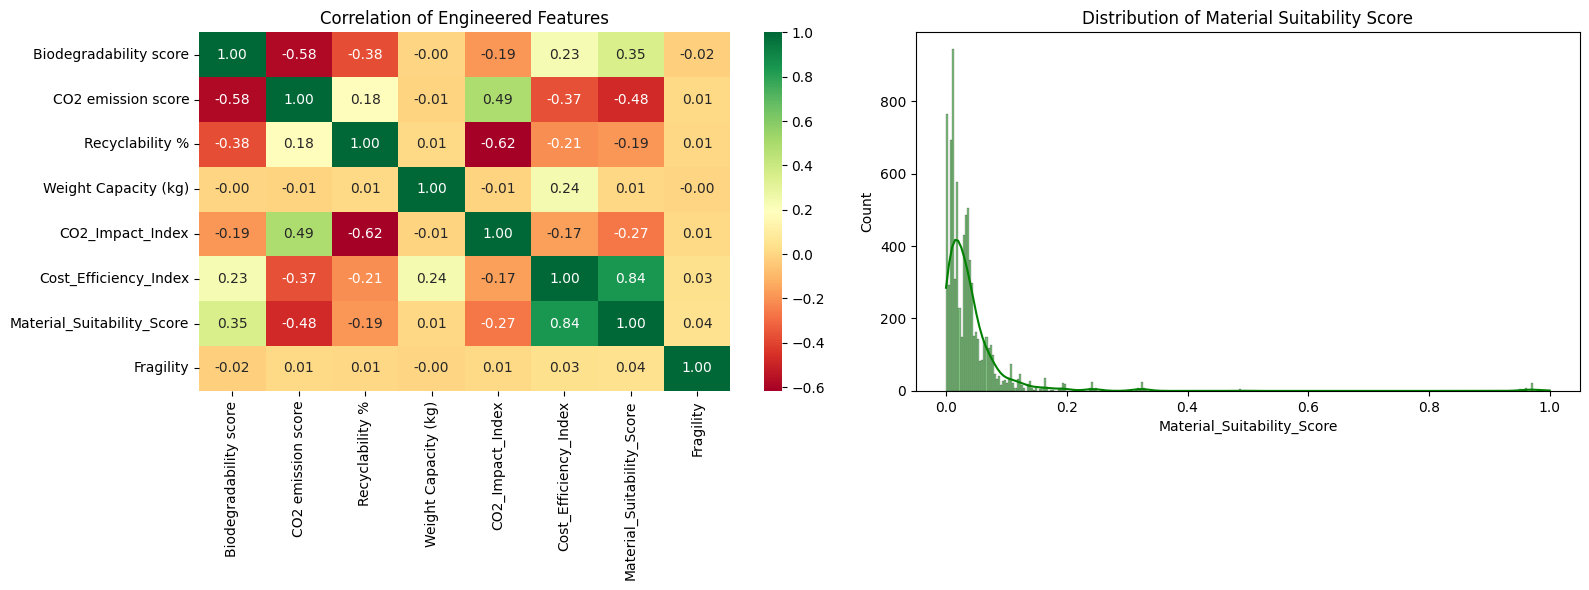

In [13]:
plt.figure(figsize=(16, 6))

# Graph 1: Correlation Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df_normalized[cols_to_normalize].corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation of Engineered Features')

# Graph 2: Distribution of Suitability Score
plt.subplot(1, 2, 2)
sns.histplot(df_normalized['Material_Suitability_Score'], kde=True, color='green')
plt.title('Distribution of Material Suitability Score')

plt.tight_layout()
plt.show()

In [14]:
# Save the new datapoints
df_normalized.to_csv('final_engineered_dataset.csv', index=False)
print("\nSuccess! Final dataset saved as 'final_engineered_dataset.csv'")


Success! Final dataset saved as 'final_engineered_dataset.csv'
